# 0. Install and Import dependencies

We will use the most advanced environment for RL-trading task - DI-engine/gym-anytrade. It's a part of DI-engine RL framework, which contains a lot of environments inside.

**Important note: tensorflow==1.15.0 works only with Python 3.7 and below**

In [153]:
%pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym==0.19.0 finta protobuf==3.20.*

     |████████████████████████████████| 2.5 MB 1.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Command errored out with exit status 1:
   command: /mnt/nikita_disk/RL-trading-agent/trading_venv/bin/python /tmp/tmpi5hvf8tc build_wheel /tmp/tmpu2o5x4qr
       cwd: /tmp/pip-install-2g8xuqr8/mpi4py
  Complete output (155 lines):
  running bdist_wheel
  running build
  running build_src
  running build_py
  creating build
  creating build/lib.linux-x86_64-cpython-37
  creating build/lib.linux-x86_64-cpython-37/mpi4py
  copying src/mpi4py/__init__.py -> build/lib.linux-x86_64-cpython-37/mpi4py
  copying src/mpi4py/__main__.py -> build/lib.linux-x86_64-cpython-37/mpi4py
  copying src/mpi4py/run.py -> build/lib.linux-x86_64-cpython-37/mpi4py
  copying src/mpi4py/bench.py -> build/lib.linux-x86_64-cpython-37/mpi4py
  creating build/lib.linux-x86_64-cpython-37/mpi4py/futures
  copying src/

In [122]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff

from stable_baselines.common.vec_env import DummyVecEnv 
from stable_baselines import A2C, DQN

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Load  Data 

Example data can be loaded from this website

https://www.marketwatch.com/tools/markets/stocks

In [123]:
df = pd.read_csv('data/Google_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [124]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [125]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [126]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [127]:
env = gym.make('stocks-v0', df=df, frame_bound=(80,250), window_size=12)

# 2. Build Environment

Here we will build and environment and plot trading result of an agent performing random actions. 

Since both random and some deep reinforcement learning policy will have probabilistic nature, we will run 10 iterations to evaluate a better mean profit and reward.

In [128]:
def evaluate_random(env):
    reward_list = []
    profit_list = []

    for i in range(10):
        state = env.reset()
        while True: 
            action = env.action_space.sample()
            n_state, reward, done, info = env.step(action)
            if done: 
                print("info", info)
                reward_list.append(env._total_reward)
                profit_list.append(env._total_profit)
                break
        
    plt.figure(figsize=(15,6))
    plt.cla()
    env.render_all()
    plt.show()

    random_mean_reward=np.array(reward_list).mean()
    print(f'Mean reward is {random_mean_reward}')

    random_mean_profit=np.array(profit_list).mean()
    print(f'Mean profit is {random_mean_profit}')

info {'total_reward': 25.33521499999989, 'total_profit': 0.5936695702929352, 'position': 1}
info {'total_reward': 44.034069999999986, 'total_profit': 0.6635219132433371, 'position': 1}
info {'total_reward': 73.48360900000003, 'total_profit': 0.7244698157358712, 'position': 0}
info {'total_reward': -37.45747400000016, 'total_profit': 0.4576123955352101, 'position': 1}
info {'total_reward': -37.242218999999864, 'total_profit': 0.4590021767365123, 'position': 0}
info {'total_reward': -6.0009750000000395, 'total_profit': 0.48136699257913407, 'position': 1}
info {'total_reward': 24.454467000000164, 'total_profit': 0.5765950640569649, 'position': 0}
info {'total_reward': 11.186321999999905, 'total_profit': 0.5384234026012181, 'position': 1}
info {'total_reward': -16.486468999999857, 'total_profit': 0.445711587204613, 'position': 1}
info {'total_reward': 3.7687830000000417, 'total_profit': 0.5303877401103598, 'position': 1}


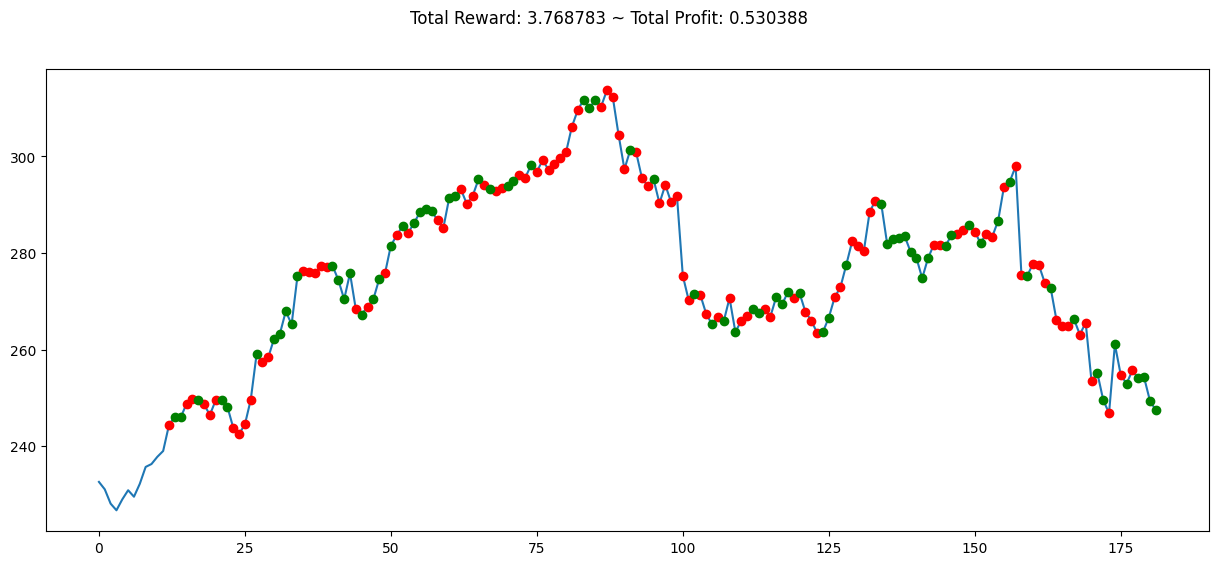

Mean reward is 8.50753290000001
Mean profit is 0.5470760658096157


In [129]:
evaluate_random(env)

As we can see, our reward function gives fee for selling in long positions. Our models predicts only actions (BUY or SELL).

We have 2 positions - Long and Short. (Short (Red) + Buy ---> Long (Green) + Sell) 

This is the graph of last iteration of random agent evaluation. 

**Also, we need to Draw a MDP-graph of an environment**

# 3. Basic model training and evaluation

### Training is done in train_scripts.py

Let's have A2C model with MlpLSTM policy as a baseline.

Model was trained on Intel® Core™ i7-10700F with 8-cores.

In [130]:
def evaluate(env, model):
    reward_list = []
    profit_list = []

    for i in range(10):
        obs = env.reset()
        while True: 
            obs = obs[np.newaxis, ...]
            action, _states = model.predict(obs)
            obs, rewards, done, info = env.step(action)
            if done:
                print("info", info)
                reward_list.append(env._total_reward)
                profit_list.append(env._total_profit)
                break

    plt.figure(figsize=(15,6))
    plt.cla()
    env.render_all()
    plt.show()

    random_mean_reward=np.array(reward_list).mean()
    print(f'Mean reward is {random_mean_reward}')

    random_mean_profit=np.array(profit_list).mean()
    print(f'Mean profit is {random_mean_profit}')

Loading a model without an environment, this model cannot be trained until it has a valid environment.
info {'total_reward': 3.9139390000001697, 'total_profit': 0.5864157930294006, 'position': 0}
info {'total_reward': 61.041104999999874, 'total_profit': 0.7011286017230612, 'position': 1}
info {'total_reward': 5.210233999999957, 'total_profit': 0.560766709592208, 'position': 0}
info {'total_reward': -25.941041000000013, 'total_profit': 0.4876215284653866, 'position': 1}
info {'total_reward': 35.94097399999998, 'total_profit': 0.5997013791435427, 'position': 0}
info {'total_reward': -24.264339999999777, 'total_profit': 0.4658464777348358, 'position': 1}
info {'total_reward': -14.019044999999949, 'total_profit': 0.4813907304457587, 'position': 0}
info {'total_reward': -37.42241600000011, 'total_profit': 0.4495110179139229, 'position': 1}
info {'total_reward': 50.515516000000105, 'total_profit': 0.626515256913791, 'position': 0}
info {'total_reward': 13.333312000000063, 'total_profit': 0.5

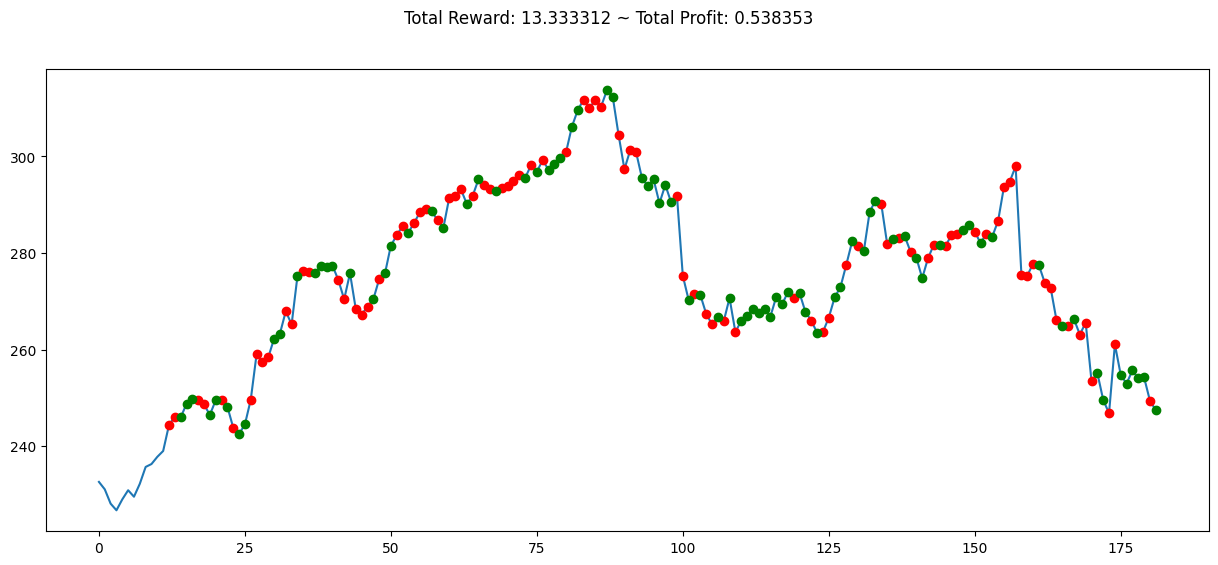

Mean reward is 6.83082380000003
Mean profit is 0.5497250128360189


In [131]:
from gym_anytrading.envs import StocksEnv

model = A2C.load("models/A2C_LSTM_Basic.zip")

env = StocksEnv(df=df, frame_bound=(80,250), window_size=12)

evaluate(env, model)

**Reward and profit are almost identical to random agent. Let's try to add custom indicators!**

# 4. Add Custom Indicators

## 4.1.1. Import New Dependencies

In [132]:
from finta import TA

## 4.1.2. Fix Volume Column

In [133]:
df['Volume'] = df['Volume'].apply(lambda x: float(f"{x}".replace(",", "")))

In [134]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

## 4.1.3. Calculate SMA, RSI and OBV

In [135]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [136]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700.0,0.000000,0.000000,0.0
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700.0,0.000000,100.000000,6202700.0
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500.0,0.000000,100.000000,12265200.0
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200.0,0.000000,100.000000,17597400.0
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100.0,0.000000,100.000000,22888500.0
2009-06-01,209.574570,215.015015,209.474472,213.493500,213.493500,6638100.0,0.000000,100.000000,29526600.0
2009-06-02,213.338333,215.195190,211.911911,214.414413,214.414413,5241900.0,0.000000,100.000000,34768500.0
2009-06-03,213.213211,216.446442,212.212219,216.041046,216.041046,7058500.0,0.000000,100.000000,41827000.0
2009-06-04,217.867874,220.840836,217.467468,220.360367,220.360367,7268900.0,0.000000,100.000000,49095900.0


## 4.1.4. Create New Environments

In [137]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [138]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [139]:
pd.DataFrame(env2.signal_features)

,0,1,2,3,4
0,196.196198,3433700.0,0.000000,0.000000,0.0
1,195.195190,6202700.0,0.000000,100.000000,6202700.0
2,202.607605,6062500.0,0.000000,100.000000,12265200.0
3,202.507507,5332200.0,0.000000,100.000000,17597400.0
4,205.555557,5291100.0,0.000000,100.000000,22888500.0
5,209.474472,6638100.0,0.000000,100.000000,29526600.0
6,211.911911,5241900.0,0.000000,100.000000,34768500.0
7,212.212219,7058500.0,0.000000,100.000000,41827000.0
8,217.467468,7268900.0,0.000000,100.000000,49095900.0
9,219.949951,7354200.0,0.000000,100.000000,56450100.0


In [140]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700.0,0.0,0.0,0.0
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700.0,0.0,100.0,6202700.0
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500.0,0.0,100.0,12265200.0
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200.0,0.0,100.0,17597400.0
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100.0,0.0,100.0,22888500.0


In [141]:
import os

# Saving file, if it's now saved

if not os.path.exists('data/Google_Custom_data.csv'):
    df.to_csv('data/Google_data_3_extra_features.csv')

# 5. Training and evaluation of extended model

### Training is done in train_scripts.py

During training and evaluation you might face following error: https://stackoverflow.com/questions/71449872/stable-baselines-module-error-gym-logger-has-no-attribute-min-level

Loading a model without an environment, this model cannot be trained until it has a valid environment.
info {'total_reward': 37.67771800000003, 'total_profit': 0.7374832681368727, 'position': 1}
info {'total_reward': 46.211257000000046, 'total_profit': 0.7376550220616751, 'position': 1}
info {'total_reward': 45.05007900000015, 'total_profit': 0.7356755953187467, 'position': 1}
info {'total_reward': 30.59565600000016, 'total_profit': 0.6857003731624842, 'position': 1}
info {'total_reward': 36.481475000000074, 'total_profit': 0.7237679924054229, 'position': 1}
info {'total_reward': 39.09413100000012, 'total_profit': 0.7410464447636328, 'position': 1}
info {'total_reward': -3.5586109999999564, 'total_profit': 0.6474852204687237, 'position': 1}
info {'total_reward': 29.1591940000001, 'total_profit': 0.7036739024269725, 'position': 1}
info {'total_reward': 29.55459500000012, 'total_profit': 0.7281826830601132, 'position': 1}
info {'total_reward': 38.31837400000012, 'total_profit': 0.6653678

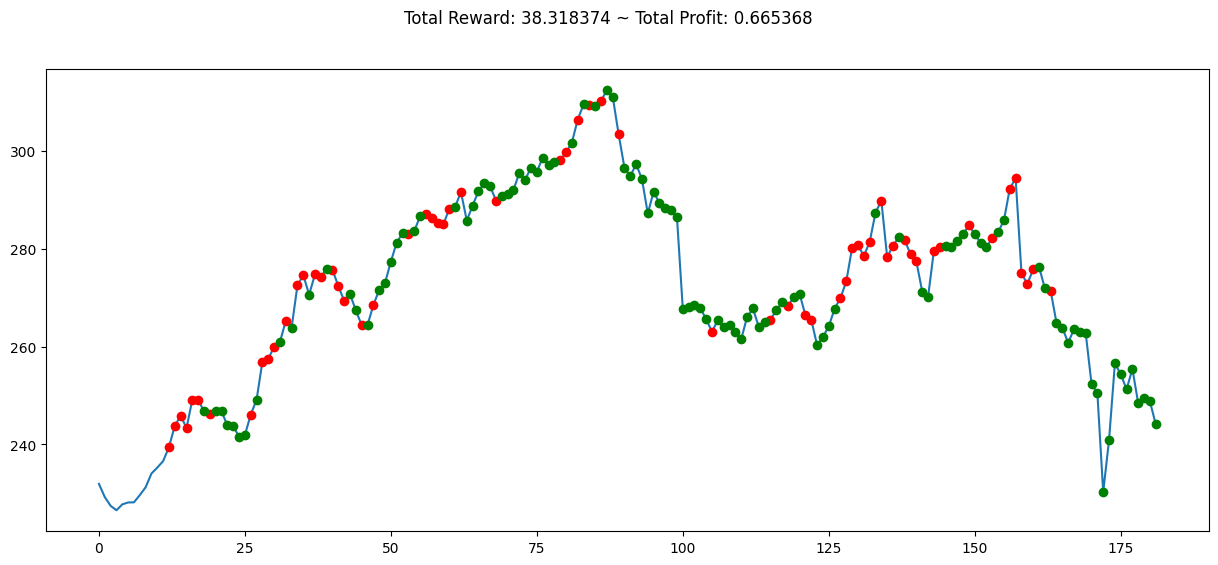

Mean reward is 32.8583868000001
Mean profit is 0.7106038377873748


In [142]:
# A2C_LSTM

df = pd.read_csv('data/Google_data_3_extra_features.csv')

model = A2C.load("models/A2C_LSTM_Custom.zip")

env = MyCustomEnv(df=df, frame_bound=(80,250), window_size=12)

evaluate(env, model)

# 6. Adding more features and comparing training time

In [143]:
df2 = df

df2['ADX'] = TA.ADX(df2)
df2['STOCH'] = TA.STOCH(df2)
df2.fillna(0, inplace=True)

In [144]:
df2.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV,ADX,STOCH
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700.0,0.000000,0.000000,0.0,0.000000,0.000000
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700.0,0.000000,100.000000,6202700.0,0.000000,0.000000
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500.0,0.000000,100.000000,12265200.0,0.000000,0.000000
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200.0,0.000000,100.000000,17597400.0,0.000000,0.000000
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100.0,0.000000,100.000000,22888500.0,0.000000,0.000000
5,2009-06-01,209.574570,215.015015,209.474472,213.493500,213.493500,6638100.0,0.000000,100.000000,29526600.0,0.000000,0.000000
6,2009-06-02,213.338333,215.195190,211.911911,214.414413,214.414413,5241900.0,0.000000,100.000000,34768500.0,0.000000,0.000000
7,2009-06-03,213.213211,216.446442,212.212219,216.041046,216.041046,7058500.0,0.000000,100.000000,41827000.0,0.000000,0.000000
8,2009-06-04,217.867874,220.840836,217.467468,220.360367,220.360367,7268900.0,0.000000,100.000000,49095900.0,0.000000,0.000000
9,2009-06-05,222.757751,223.893890,219.949951,222.382385,222.382385,7354200.0,0.000000,100.000000,56450100.0,0.000000,0.000000


In [145]:
# Saving file, if it's now saved

if not os.path.exists('data/Google_Extended_Custom_data.csv'):
    df.to_csv('data/Google_data_5_extra_features.csv')

### A2C_LSTM

Loading a model without an environment, this model cannot be trained until it has a valid environment.
info {'total_reward': 46.13110199999997, 'total_profit': 0.823696321072081, 'position': 1}
info {'total_reward': 48.418395000000004, 'total_profit': 0.8558651540059307, 'position': 1}
info {'total_reward': 50.600584999999995, 'total_profit': 0.8380897855488094, 'position': 1}
info {'total_reward': 44.474456999999944, 'total_profit': 0.8315104709344686, 'position': 1}
info {'total_reward': 45.35036999999991, 'total_profit': 0.8090968657222134, 'position': 1}
info {'total_reward': 44.26425099999997, 'total_profit': 0.843744493127943, 'position': 1}
info {'total_reward': 46.91189499999999, 'total_profit': 0.8512658208052288, 'position': 1}
info {'total_reward': 45.660642999999965, 'total_profit': 0.8350297394014773, 'position': 1}
info {'total_reward': 45.90588199999999, 'total_profit': 0.8357548810370584, 'position': 1}
info {'total_reward': 48.88888499999999, 'total_profit': 0.85726978

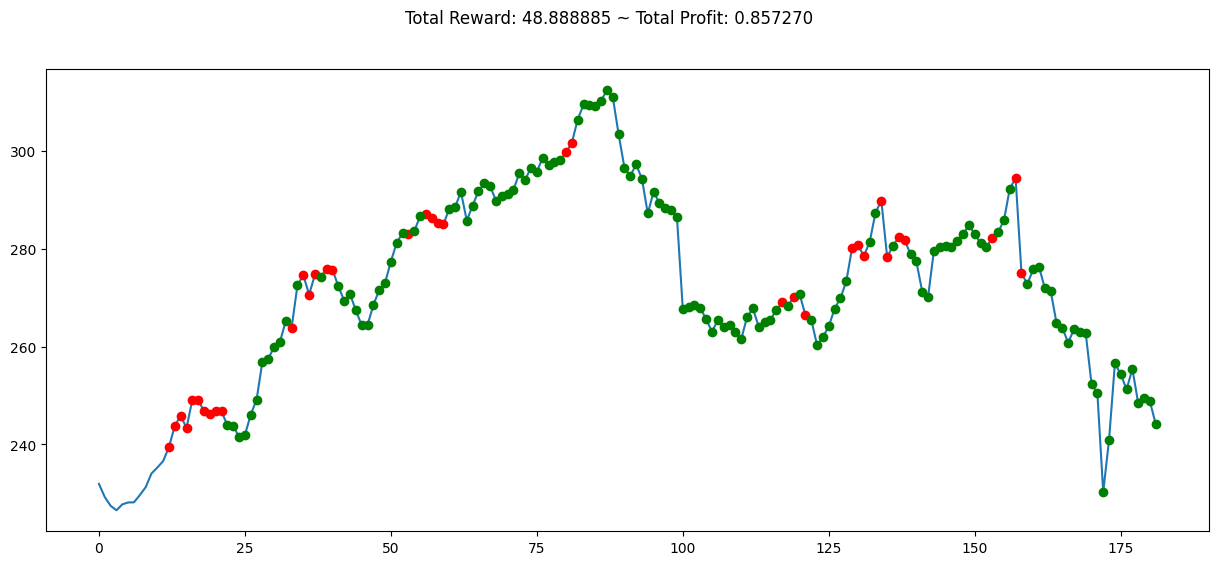

Mean reward is 46.66064649999997
Mean profit is 0.8381323320373575


In [148]:
model = A2C.load("models/A2C_LSTM_Extended_Custom.zip")

def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume', 'SMA', 'RSI', 'OBV', 'ADX', 'STOCH']].to_numpy()[
        start:end]
    return prices, signal_features


class ExtendedCustomEnv(StocksEnv):
    _process_data = add_signals



env = ExtendedCustomEnv(df=df2, frame_bound=(80,250), window_size=12)

evaluate(env, model)

Training time is roughly the same. **Screenshots can be provided**

# 7. Trying out other algorythms and models.

### A2C_Mlp

Loading a model without an environment, this model cannot be trained until it has a valid environment.
info {'total_reward': 3.543521000000055, 'total_profit': 0.5973964485764741, 'position': 1}
info {'total_reward': 20.860904000000147, 'total_profit': 0.6602252659446992, 'position': 1}
info {'total_reward': -4.634701999999862, 'total_profit': 0.5780669105020854, 'position': 1}
info {'total_reward': -16.881878, 'total_profit': 0.5770525066369595, 'position': 1}
info {'total_reward': 14.654680000000099, 'total_profit': 0.6656984211077829, 'position': 1}
info {'total_reward': 2.5425420000000543, 'total_profit': 0.623201182932826, 'position': 1}
info {'total_reward': 17.21211600000001, 'total_profit': 0.6133185174541016, 'position': 1}
info {'total_reward': 22.90292500000001, 'total_profit': 0.6808388763125299, 'position': 1}
info {'total_reward': 7.797763000000117, 'total_profit': 0.6315795290702406, 'position': 1}
info {'total_reward': 3.1080960000000175, 'total_profit': 0.5845365210664

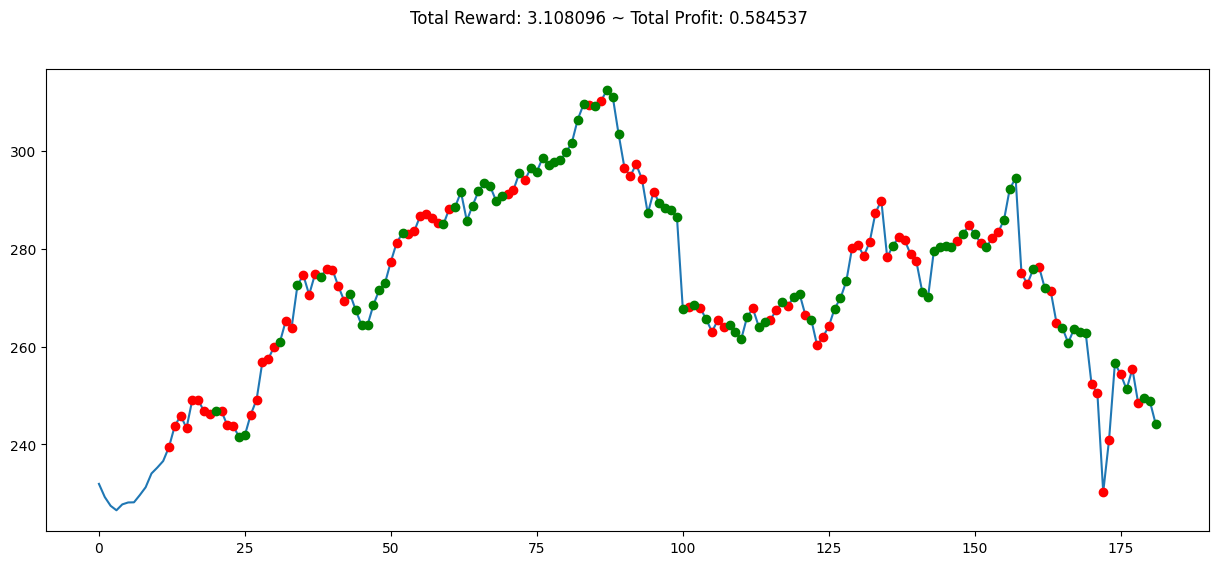

Mean reward is 7.110596700000064
Mean profit is 0.6211914179604102


In [149]:
model = A2C.load("models/A2C_Mlp.zip")
evaluate(env, model)

### DQN_Mlp

Loading a model without an environment, this model cannot be trained until it has a valid environment.




info {'total_reward': -11.876860000000136, 'total_profit': 0.7214521763017729, 'position': 0}
info {'total_reward': -11.876860000000136, 'total_profit': 0.7214521763017729, 'position': 0}
info {'total_reward': -11.876860000000136, 'total_profit': 0.7214521763017729, 'position': 0}
info {'total_reward': -11.876860000000136, 'total_profit': 0.7214521763017729, 'position': 0}
info {'total_reward': -11.876860000000136, 'total_profit': 0.7214521763017729, 'position': 0}
info {'total_reward': -11.876860000000136, 'total_profit': 0.7214521763017729, 'position': 0}
info {'total_reward': -11.876860000000136, 'total_profit': 0.7214521763017729, 'position': 0}
info {'total_reward': -11.876860000000136, 'total_profit': 0.7214521763017729, 'position': 0}
info {'total_reward': -11.876860000000136, 'total_profit': 0.7214521763017729, 'position': 0}
info {'total_reward': -11.876860000000136, 'tot

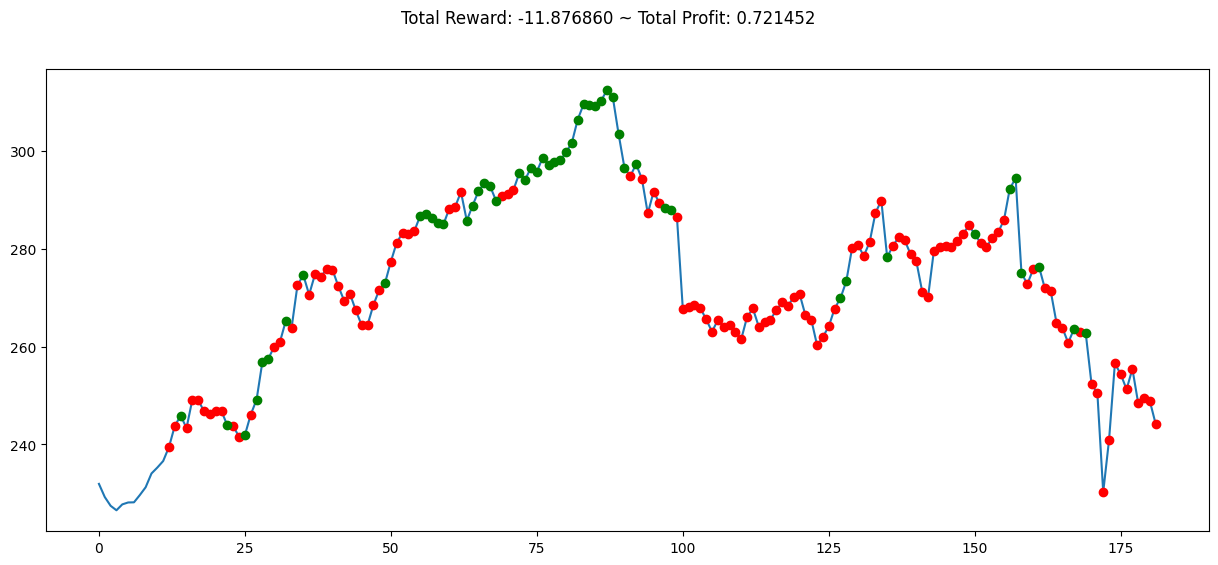

Mean reward is -11.876860000000136
Mean profit is 0.7214521763017728


In [151]:
model = DQN.load("models/DQN_Mlp.zip")
evaluate(env, model)

### Ln_DQN_Mlp

Loading a model without an environment, this model cannot be trained until it has a valid environment.
info {'total_reward': -21.771804999999915, 'total_profit': 0.7324662607586432, 'position': 1}
info {'total_reward': -21.771804999999915, 'total_profit': 0.7324662607586432, 'position': 1}
info {'total_reward': -21.771804999999915, 'total_profit': 0.7324662607586432, 'position': 1}
info {'total_reward': -21.771804999999915, 'total_profit': 0.7324662607586432, 'position': 1}
info {'total_reward': -21.771804999999915, 'total_profit': 0.7324662607586432, 'position': 1}
info {'total_reward': -21.771804999999915, 'total_profit': 0.7324662607586432, 'position': 1}
info {'total_reward': -21.771804999999915, 'total_profit': 0.7324662607586432, 'position': 1}
info {'total_reward': -21.771804999999915, 'total_profit': 0.7324662607586432, 'position': 1}
info {'total_reward': -21.771804999999915, 'total_profit': 0.7324662607586432, 'position': 1}
info {'total_reward': -21.771804999999915, 'total_p

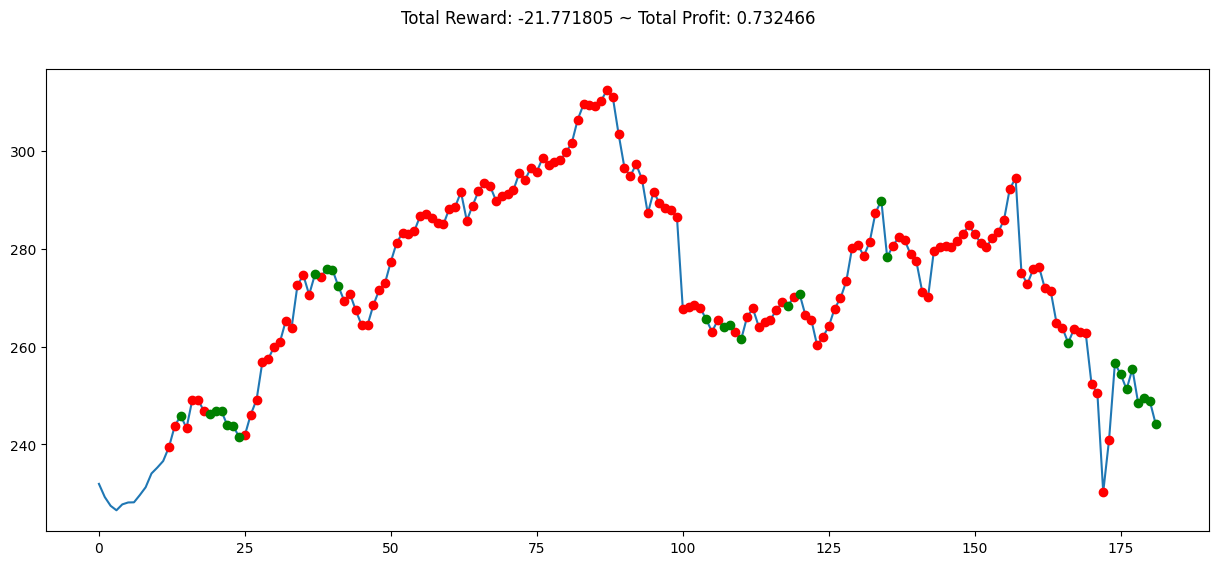

Mean reward is -21.771804999999915
Mean profit is 0.7324662607586433


In [152]:
model = DQN.load("models/Ln_DQN_Mlp.zip")
evaluate(env, model)

### PPO2_Mlp

In [ ]:
model = DQN.load("models/Ln_DQN_Mlp.zip")
evaluate(env, model)